# Bootcamp Ciência de Dados

## Trabalho Prático do Módulo I

Análise utilizando K-Means considerando dataset gerado aleatoriamente:
make_blobs(n_samples=500, centers=20, random_state=999)


Dataset disponível no <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv" target="_blank">Kaggle</a>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [12]:
# Importando bibliotecas

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs     
from sklearn.cluster import KMeans

In [67]:
# Gerando o dataset

X,y = make_blobs(n_samples=500, centers=20, random_state=999)
X

array([[ -5.2620148 ,  -0.24728593],
       [  5.31683671,  -0.33089844],
       [ -6.83945881,  -4.08790686],
       [  5.97441173,   3.04157261],
       [ -4.7083547 ,  -3.63185291],
       [ -2.6838669 ,   9.22071939],
       [ -4.80139396,  -1.72755734],
       [  1.23997568,   3.92758838],
       [  0.83697294,   1.51110033],
       [ -7.82975044,  -7.87438995],
       [  4.85223514,   7.55122822],
       [  4.76074876,   6.77723316],
       [  6.92134276,   7.014905  ],
       [ -7.61056134,  -1.09433861],
       [ -9.23921931,  -4.28234216],
       [ -2.69331481,  -2.10967855],
       [  5.62665398,   1.07296993],
       [ -3.21509213,  -1.42903039],
       [  5.45578904, -10.95674025],
       [ -8.2318645 ,   1.25370414],
       [  6.22044468,   1.63372903],
       [ -5.09953625,  -6.58268794],
       [ -8.60648993,  -3.93596728],
       [ -5.59495235,  -0.18780896],
       [ -5.55984591,   2.28773326],
       [  7.04465952, -10.58723917],
       [  3.44558397,  -9.5552469 ],
 

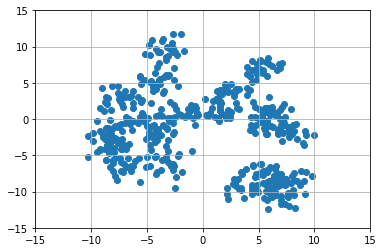

In [64]:
# Plotagem do gráfico com elementos do dataset

plt.scatter(X[:,0], X[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()

<function matplotlib.pyplot.show(*args, **kw)>

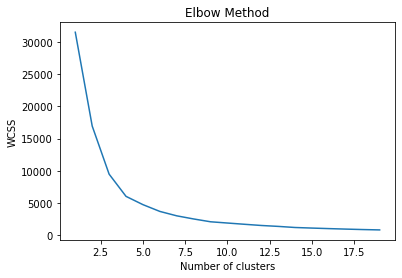

In [65]:
wcss = []
for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [91]:
# Definindo quantidade de clusters (método 1)

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 1

optimal_number_of_clusters(wcss)


4

In [81]:
# Definindo a quantidade necessária de clusters (método 2)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


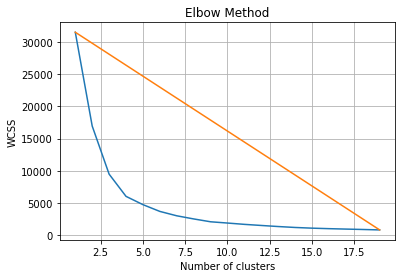

In [82]:
# Plotando o gráfico do método de Elbow

plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

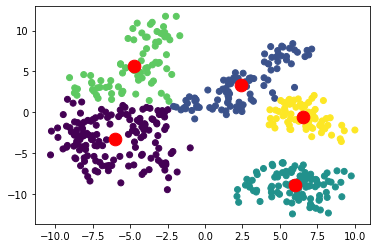

In [94]:
# Definindo os clusters, utilizando Kmeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)


# Plotando os gráfico, printando os clusters de vermelho e colorindo os elementos de cada cluster

plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=160, c='red')
plt.show()

### Respo

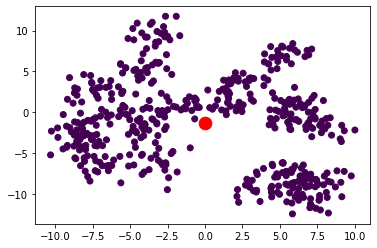

In [107]:
# Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)


# Plotando os gráfico, printando os clusters de vermelho e colorindo os elementos de cada cluster

plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=160, c='red')
plt.show()

In [105]:
# Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

wcss

# Considera-se o primeiro valor

[31547.372471390474,
 16949.21447214791,
 9464.847250570498,
 6005.101775346185,
 4717.404091931213,
 3662.640328609664,
 2981.250467046835,
 2492.974965368178,
 2049.8679429014364,
 1852.956713069783,
 1648.0617060170198,
 1475.48147668611,
 1309.9279051756953,
 1164.2924783450712,
 1056.8944290521974,
 978.2442707784927,
 912.7175094658716,
 851.1520936215262,
 783.2224484936136,
 4717.404091931213,
 4717.404091931213,
 4717.404091931213]

In [103]:
# Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
wcss.append(kmeans.inertia_)

wcss

# Considera-se o último valor

[31547.372471390474,
 16949.21447214791,
 9464.847250570498,
 6005.101775346185,
 4717.404091931213,
 3662.640328609664,
 2981.250467046835,
 2492.974965368178,
 2049.8679429014364,
 1852.956713069783,
 1648.0617060170198,
 1475.48147668611,
 1309.9279051756953,
 1164.2924783450712,
 1056.8944290521974,
 978.2442707784927,
 912.7175094658716,
 851.1520936215262,
 783.2224484936136,
 4717.404091931213,
 4717.404091931213,
 4717.404091931213]